# Notebook initialization

In [14]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from IPython.display import Image, display, Audio

In [15]:
def load_features(directory):
    au_features = pd.read_csv('{}/{}/audio_features.csv'.format('../data/output/features',directory), index_col=0)
    im_features = pd.read_csv('{}/{}/image_features.csv'.format('../data/output/features',directory), index_col=0)
    
    # Drop redundant columns
    im_features = im_features.drop(['label'], axis=1)

    # Merge audio and image features
    features = pd.concat([au_features, im_features], axis=1)

    # Only look at clips less than 300s long
    features = features[features.length < 300]
    
    return features

# Import data

In [16]:
features = load_features('train')
features.head()

,audio_file,image_file,length,label,percent_silence,ring_count,last_ring_to_end,white_proportion
index,,,,,,,,
0,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,52.740,0,0.342474,0,52.704000,0.831465
1,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,27.000,1,0.958180,0,26.928000,0.977077
2,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,56.088,0,0.208273,0,56.016000,0.853612
3,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,215.640,0,0.122387,0,215.568000,0.823863
4,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,117.216,0,0.407660,2,107.154625,0.880819


## Clean data

In [17]:
print(len(features[features.isnull().any(axis=1)]))
features[features.isnull().any(axis=1)].head()

1


,audio_file,image_file,length,label,percent_silence,ring_count,last_ring_to_end,white_proportion
index,,,,,,,,
14274,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,/Users/jjelosua/Developer/lanacion/ML_audio_cl...,84.24,1,0.003811,0,84.168,NaN


In [18]:
# just drop the remaning rows with nan values
features = features.dropna()

# Prepare data

In [19]:
f = features
features_1 = f[f.label == 1]

In [20]:
from sklearn import preprocessing
# See if we can distinguish voice mail clips from the others

# Features to use
columns = ['length', 'ring_count', 'last_ring_to_end', 'percent_silence', 'white_proportion']

X_train_all = features_1[columns]
#features_1 = features_1[['length', 'last_ring_to_end_length', 'white_proportion']]
scaler = preprocessing.StandardScaler().fit(X_train_all)
X_train_all_scaled = scaler.transform(X_train_all)

# Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X_train_all_scaled)

# Look at cluster sizes
unique, counts = np.unique(labels, return_counts=True)
print(counts)

[3146 5277]


# Random check each cluster images

In [22]:
# Look at images by cluster to see if they seem to make sense
images = features_1['image_file']
clusters = [[] for _ in range(max(labels)+1)]
for label, img in zip(labels, images):
    clusters[label].append(img)

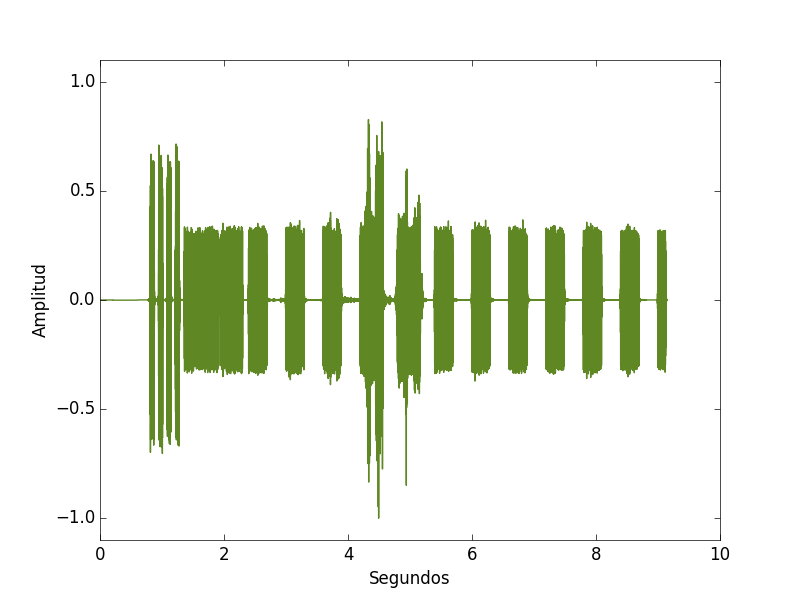

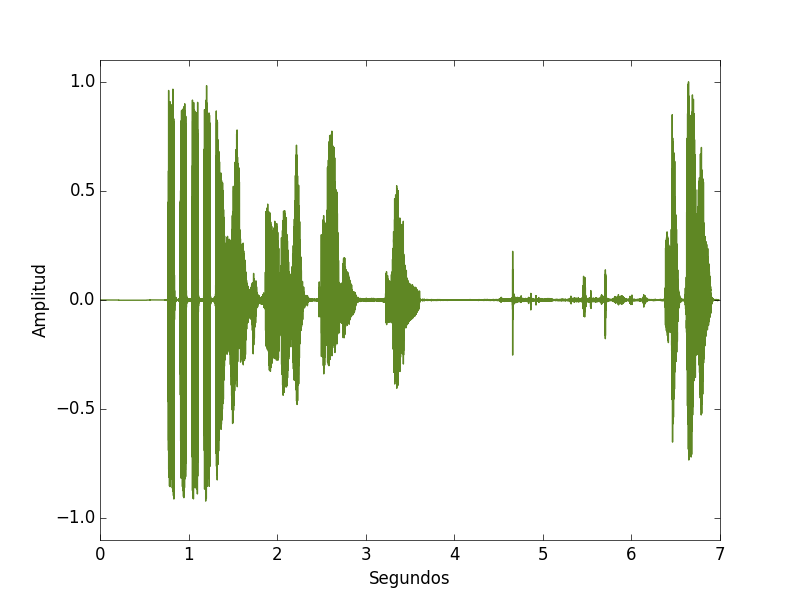

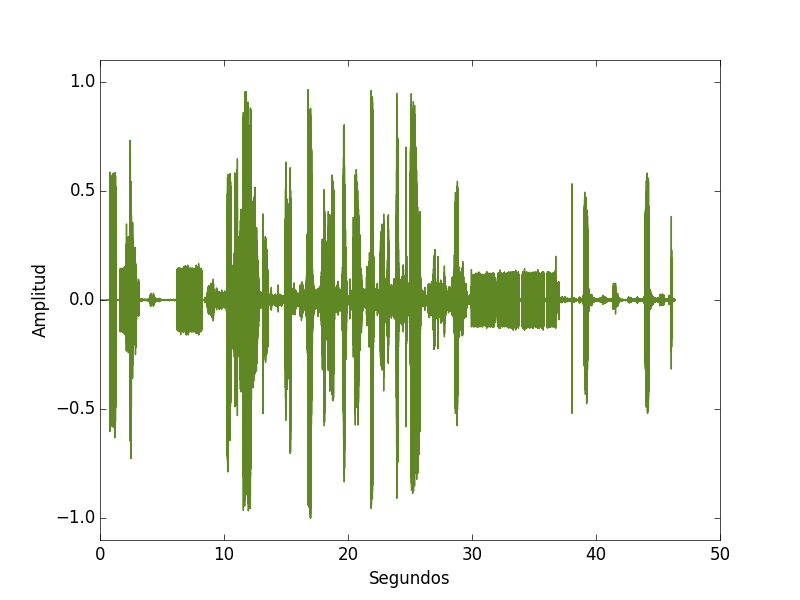

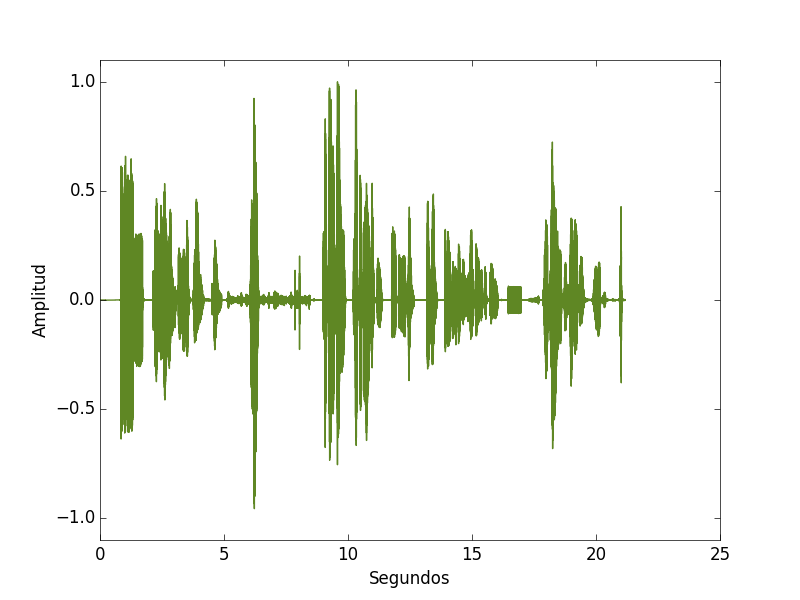

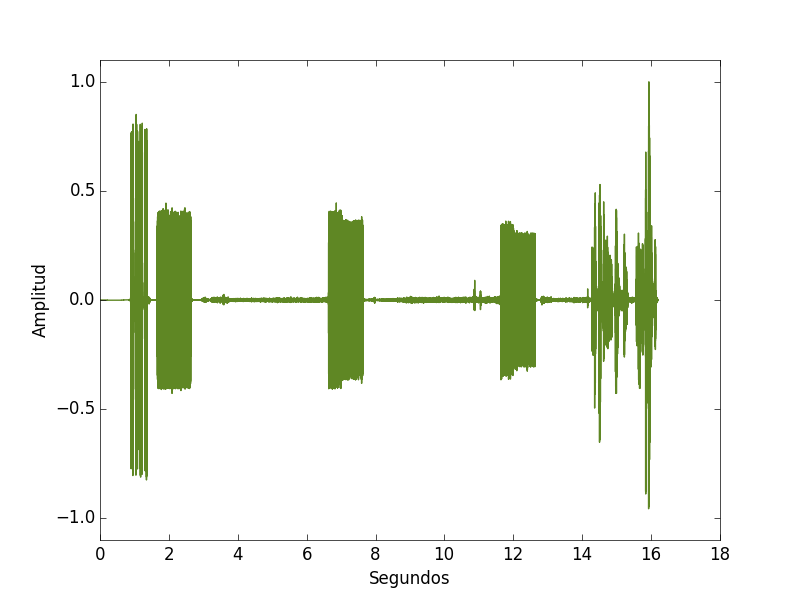

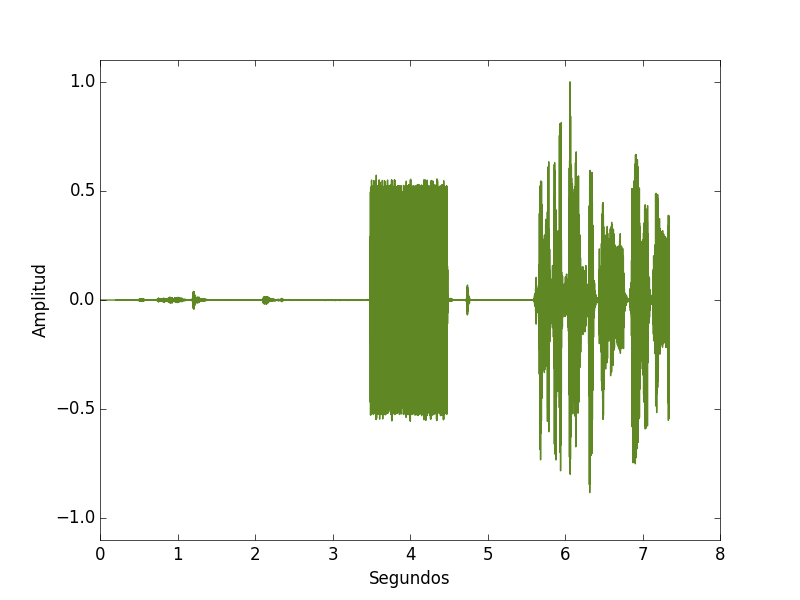

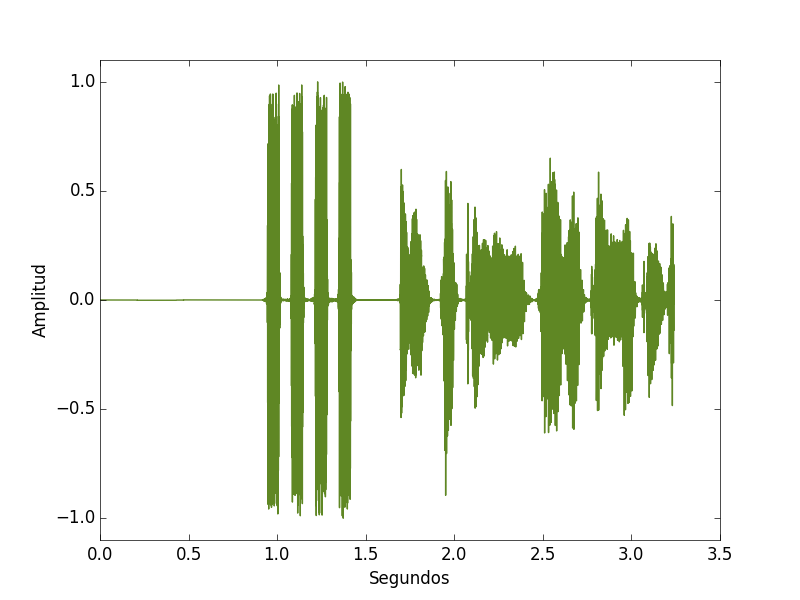

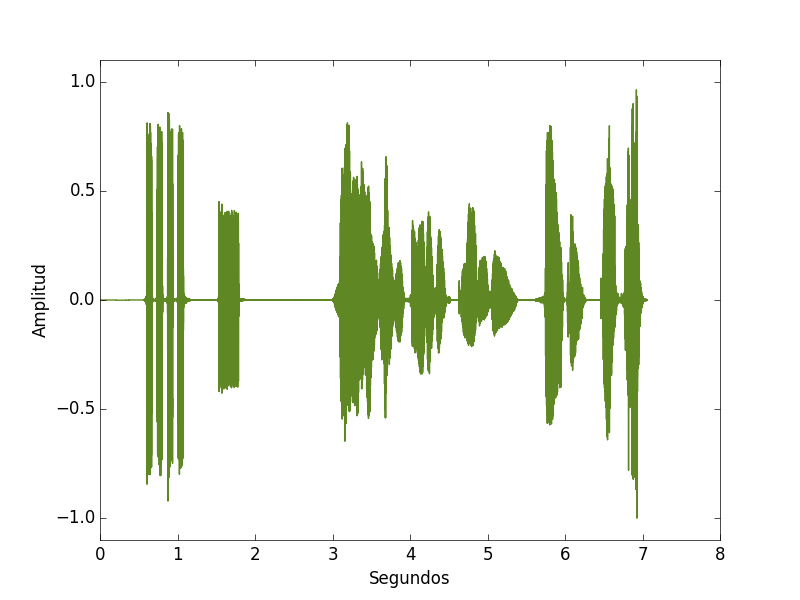

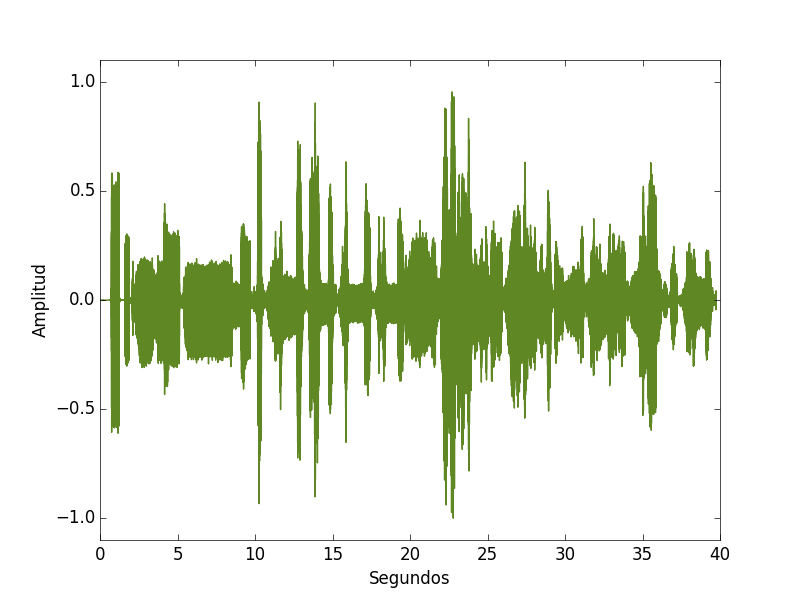

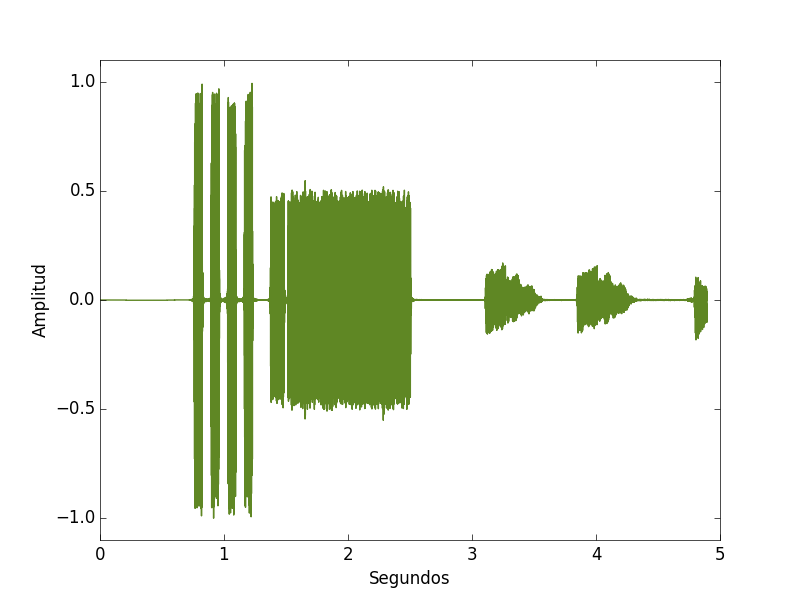

In [23]:
# Cluster 1 random selection
for img in random.sample(clusters[0], 10):
    display(Image(filename=img, width=320))

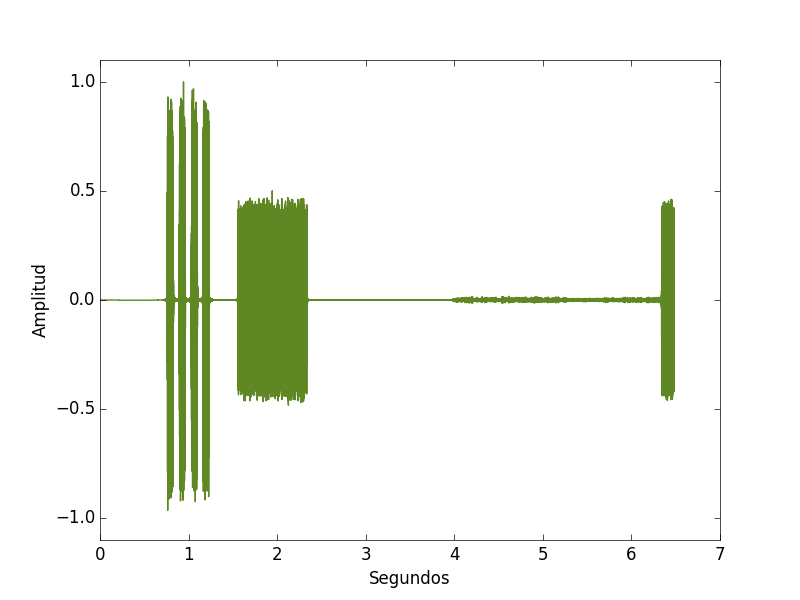

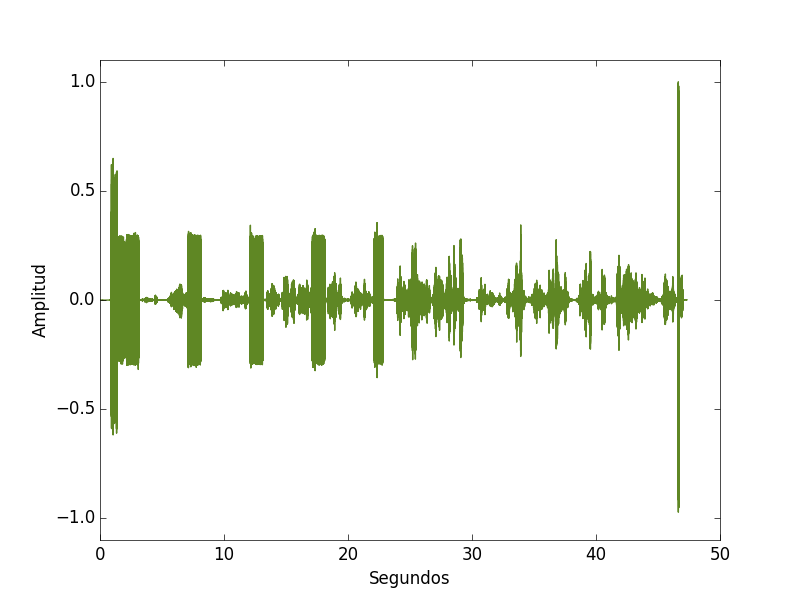

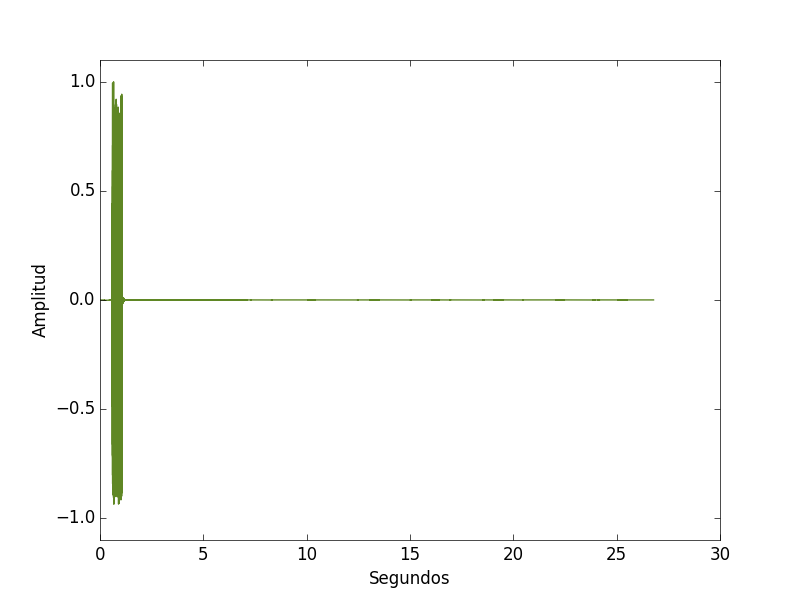

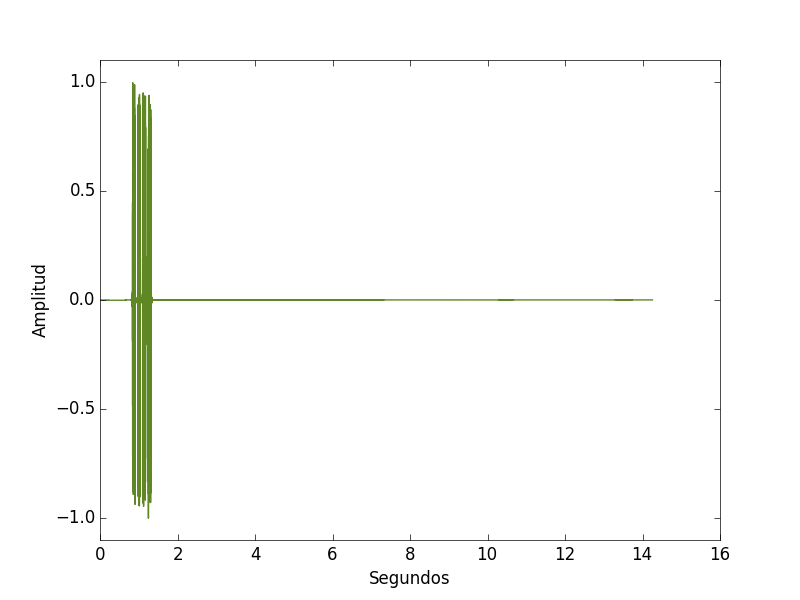

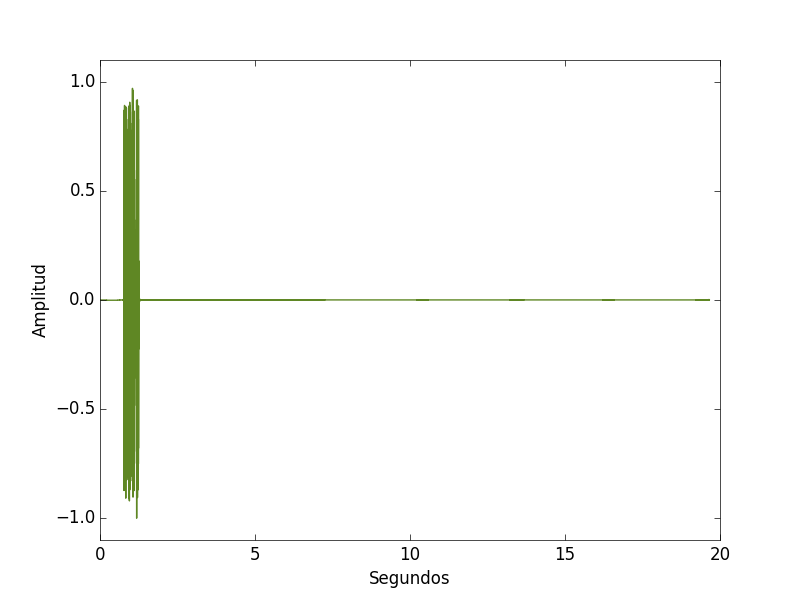

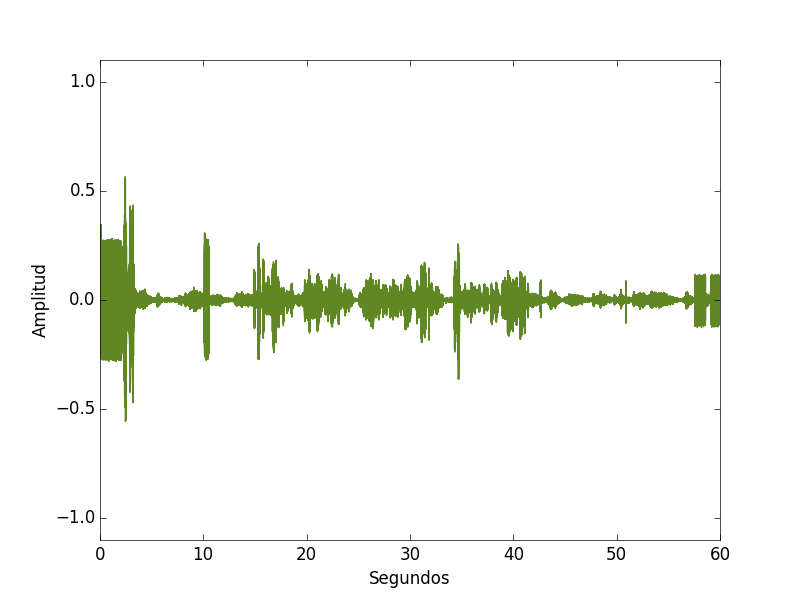

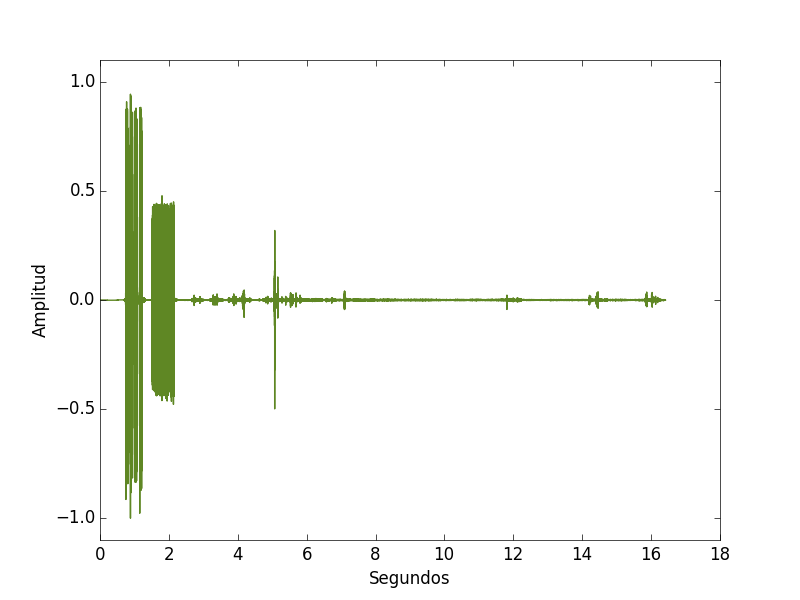

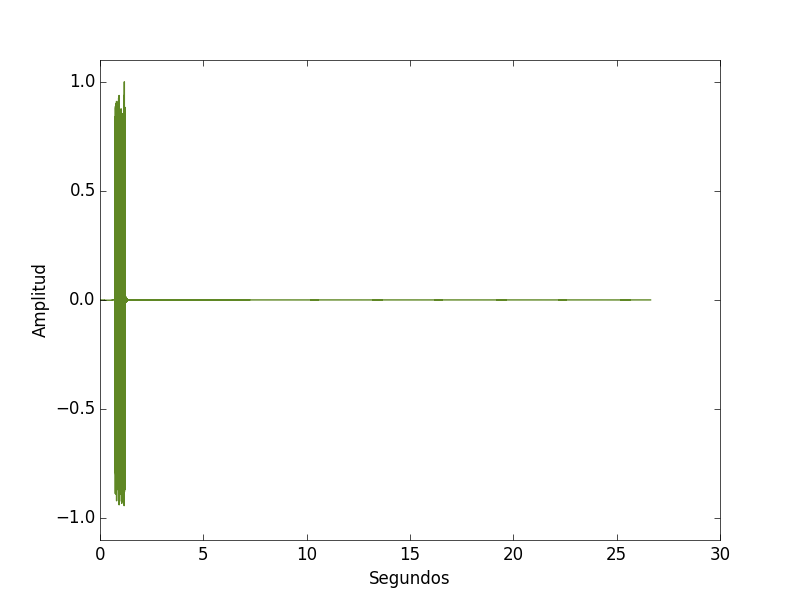

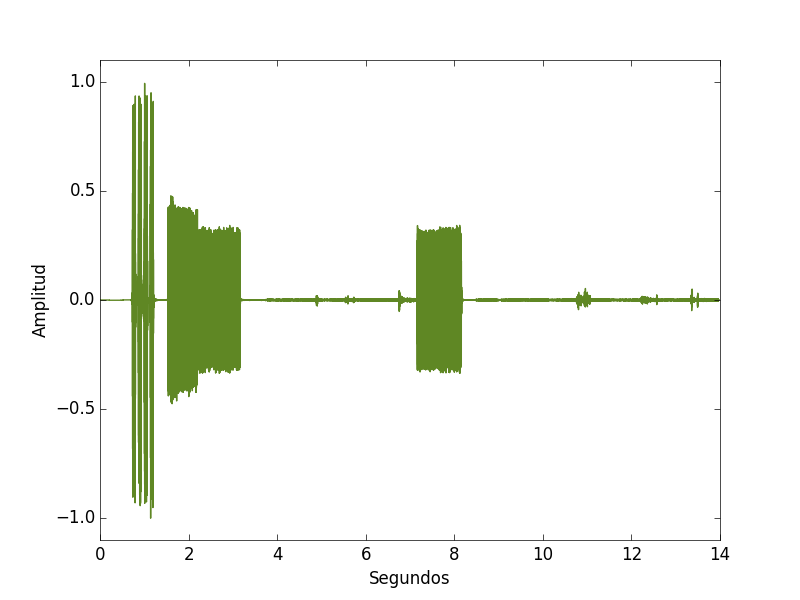

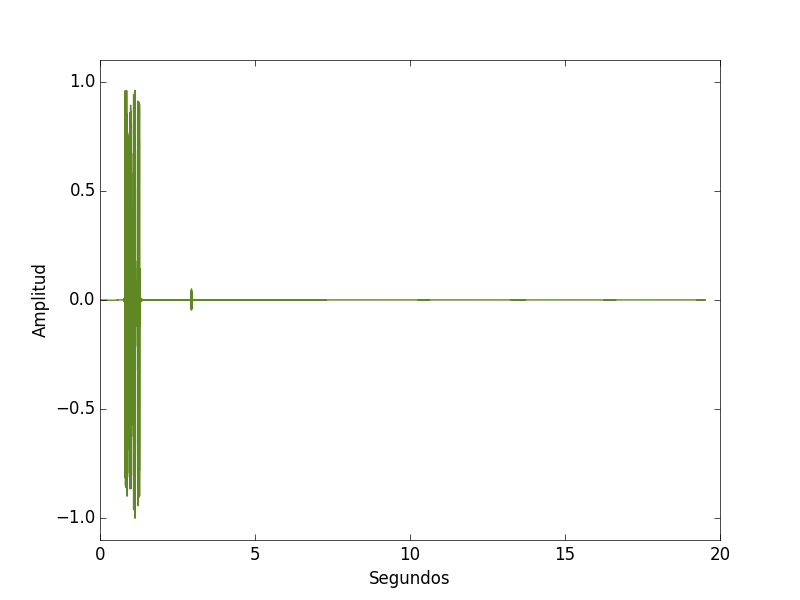

In [24]:
# Cluster 2 random selection
for img in random.sample(clusters[1], 10):
    display(Image(filename=img, width=320))

In [25]:
# Cluster 2 random selection
for img in clusters[2]:
    display(Image(filename=img, width=320))

IndexError: list index out of range

# Dimensionality reduction and plot

## TSNE

In [ ]:
from sklearn.manifold import TSNE
# http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
# http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
X_tsne = TSNE(n_components=2, verbose=2).fit_transform(X_train_all_scaled)

In [ ]:
# Plot tsne results
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = PCA(n_components=2).fit_transform(X_train_all_scaled)

In [ ]:
# Plot PCA results
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)